In [1]:
# HPC
import numpy as np
import xarray as xr
from scipy.interpolate import interp1d

# Plotting
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import cm
from mpl_toolkits.axes_grid1 import make_axes_locatable

# Paths and stuff
import os
import sys

sys.path.append('/home/shreyas/pySICOPOLIS/src')
from pySICOPOLIS import *

In [2]:
modelPath = '/home/shreyas/update_to_develop_sicopolis/sicopolis_spinups/sico_out/'
dataPath = '/scratch2/shreyas/GrIS_paleo_data/'

ds_age  = xr.open_dataset(dataPath + 'RRRAG4_Greenland_1993_2013_01_age_grid.nc')
# ds_age_correct = ageData.correctAgeDataset(ds_age,
#                             path = dataPath,
#                             filename = 'RRRAG4_Greenland_1993_2013_01_age_grid_corrected.nc',
#                             zetaLevels = 26,
#                             unCorrupt = False)
ds_age_correct = xr.open_dataset(dataPath + 'RRRAG4_Greenland_1993_2013_01_age_grid_corrected.nc')

ds_age_40km  = xr.open_dataset(dataPath + 'age_data_40kms.nc')
ds_ser_grl40_bm5_paleo17a_CT4_BH0_m11ka_pkp = xr.open_dataset(modelPath + 'grl40_bm5_paleo17a_CT4_BH0_m11ka_pkp/grl40_bm5_paleo17a_CT4_BH0_m11ka_pkp_ser.nc')
ds_grl40_bm5_paleo17a_CT4_BH0_m11ka_pkp = xr.open_dataset(modelPath + 'grl40_bm5_paleo17a_CT4_BH0_m11ka_pkp/grl40_bm5_paleo17a_CT4_BH0_m11ka_pkp0006.nc')

In [3]:
x = ds_grl40_bm5_paleo17a_CT4_BH0_m11ka_pkp['x'].data
y = ds_grl40_bm5_paleo17a_CT4_BH0_m11ka_pkp['y'].data
sigma_level_c = ds_grl40_bm5_paleo17a_CT4_BH0_m11ka_pkp['sigma_level_c'].data
age_c = ds_grl40_bm5_paleo17a_CT4_BH0_m11ka_pkp['age_c'].data
H = ds_grl40_bm5_paleo17a_CT4_BH0_m11ka_pkp['H'].data
cell_area = ds_grl40_bm5_paleo17a_CT4_BH0_m11ka_pkp['cell_area'].data
zb = ds_grl40_bm5_paleo17a_CT4_BH0_m11ka_pkp['zb'].data

H_data = ds_age_40km['H'].data
x_raw_data = ds_age_correct['xData'].data
y_raw_data = ds_age_correct['yData'].data
sigma_level_c_raw_data = np.arange(0., 1.+1/25.0, 1/25.0)
H_raw_data = ds_age_correct['H'].data

xMesh = np.tile(x[:, np.newaxis], sigma_level_c.shape[0]).T
yMesh = np.tile(y[:, np.newaxis], sigma_level_c.shape[0]).T
xMesh_raw_data = np.tile(x_raw_data[:, np.newaxis], sigma_level_c_raw_data.shape[0]).T
yMesh_raw_data = np.tile(y_raw_data[:, np.newaxis], sigma_level_c_raw_data.shape[0]).T

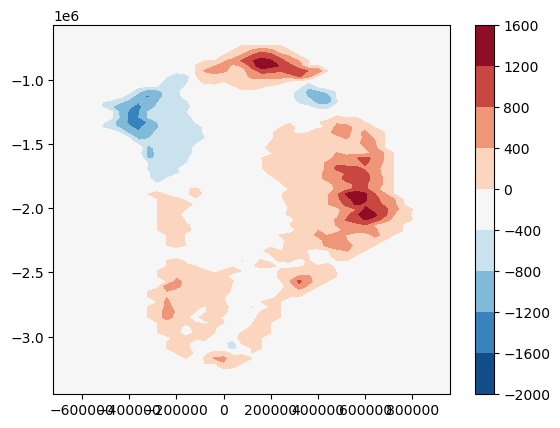

In [4]:
plt.contourf(x, y, H-H_data, cmap = "RdBu_r")
plt.colorbar()

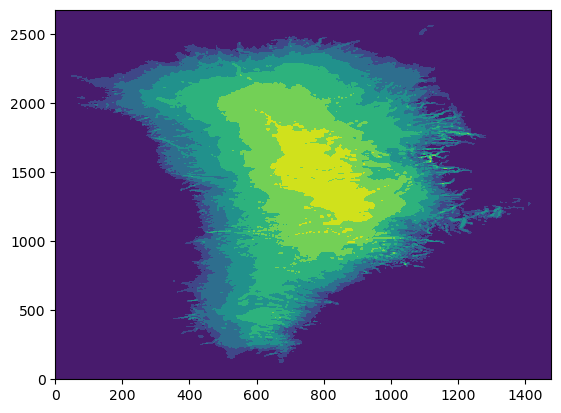

In [5]:
plt.contourf(H_raw_data)

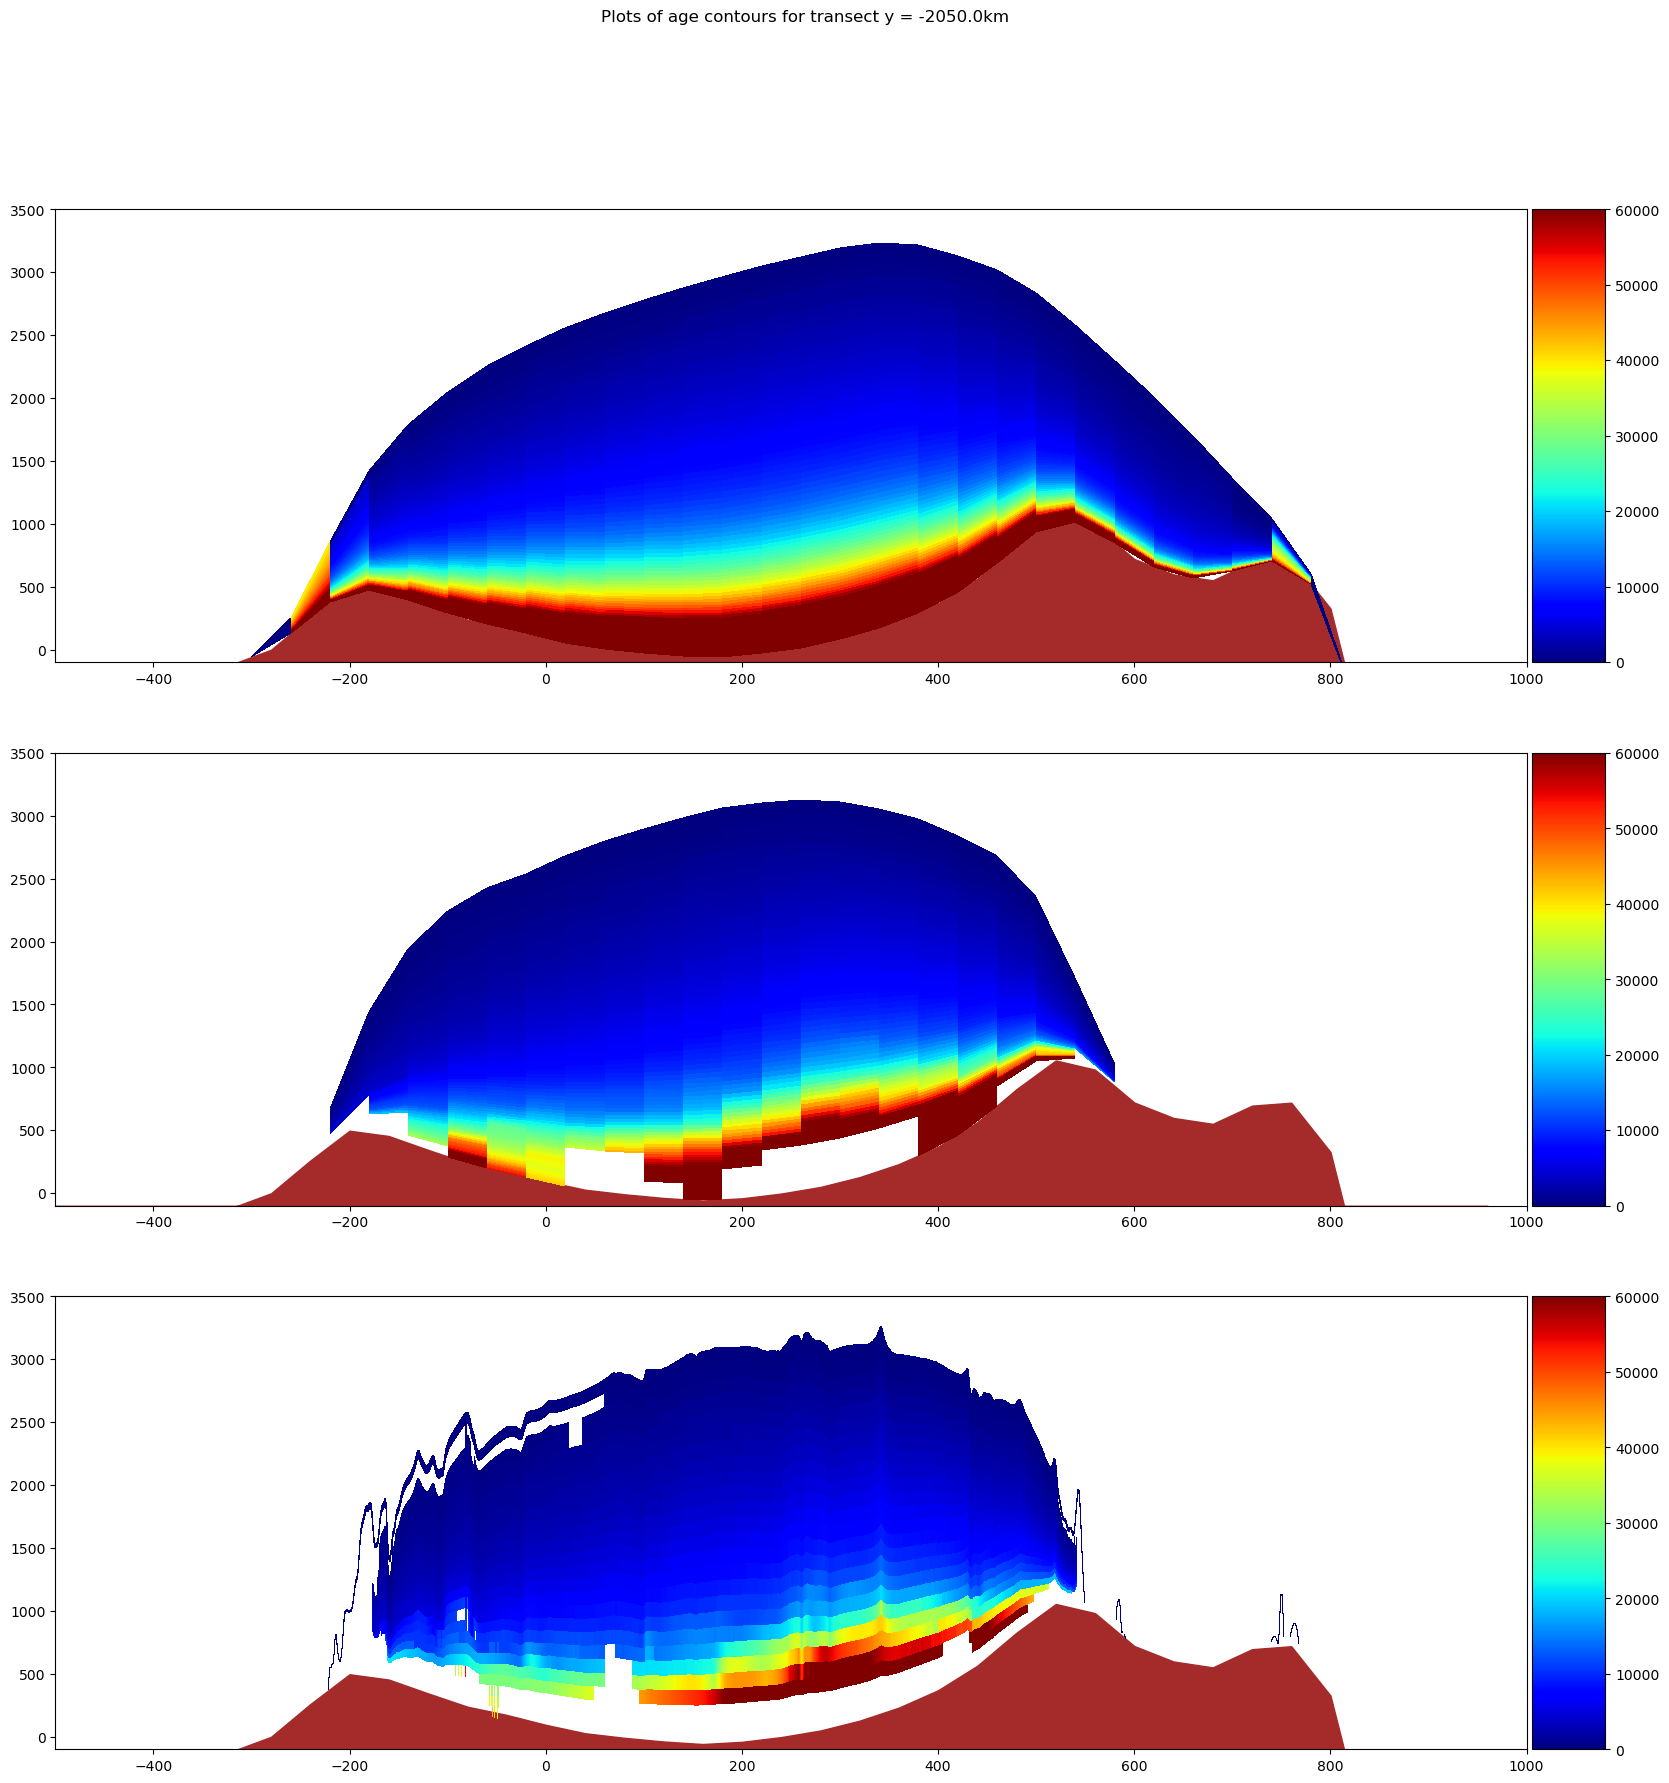

In [6]:
plt.rcParams["figure.figsize"] = (20, 20)
fig, ax = plt.subplots(3,1)

x_parallel_transect_idx = 35 # Corresponds to y = -2050 km
x_parallel_transect_raw_data_idx = 1294 # Corresponds to y = -2050 km

fig.suptitle(f"Plots of age contours for transect y = {y_raw_data[x_parallel_transect_raw_data_idx]}km")

ax[0].fill_between(x/1000, zb[x_parallel_transect_idx, :], -100.0, color='brown', alpha=1.0)
z_coords = zb[x_parallel_transect_idx, :] + sigma_level_c[:, np.newaxis]*H[x_parallel_transect_idx, :]
# H_mask = H[x_parallel_transect_idx, :] >= 2000.0
im = ax[0].pcolormesh(xMesh/1000, z_coords, age_c[:, x_parallel_transect_idx, :], cmap = 'jet', vmin = 0, vmax = 60000)
ax[0].set_xlim(-500, 1000)
ax[0].set_ylim(-100, 3500)
divider = make_axes_locatable(ax[0])
cax = divider.append_axes('right', size='5%', pad=0.05)
colorbar = fig.colorbar(im, cax=cax)

ax[1].fill_between(x/1000, zb[x_parallel_transect_idx, :], -100.0, color='brown', alpha=1.0)
z_coords = zb[x_parallel_transect_idx, :] + sigma_level_c[:, np.newaxis]*H_data[x_parallel_transect_idx, :]
# H_data_mask = H_data[x_parallel_transect_idx, :] >= 2000.0
array = ds_age_40km['age_c'][:, x_parallel_transect_idx, :]
array = np.where(array == -999, np.nan, array)
im = ax[1].pcolormesh(xMesh/1000.0, z_coords, array, cmap = 'jet', vmin = 0, vmax = 60000)
ax[1].set_xlim(-500, 1000)
ax[1].set_ylim(-100, 3500)
divider = make_axes_locatable(ax[1])
cax = divider.append_axes('right', size='5%', pad=0.05)
colorbar = fig.colorbar(im, cax=cax)

interp_func = interp1d(x/1000.0, zb[x_parallel_transect_idx, :], kind='linear')
zb_interpolated = interp_func(x_raw_data)
z_coords = zb_interpolated + sigma_level_c_raw_data[:, np.newaxis]*H_raw_data[x_parallel_transect_raw_data_idx, :]
# H_raw_data_mask = H_raw_data[x_parallel_transect_raw_data_idx, :] >= 2000.0

ax[2].fill_between(x_raw_data, zb_interpolated, -100.0, color='brown', alpha=1.0)
im = ax[2].pcolormesh(xMesh_raw_data, z_coords, ds_age_correct['age_c'][:, x_parallel_transect_raw_data_idx, :], cmap = 'jet', vmin = 0, vmax = 60000)
ax[2].set_xlim(-500, 1000)
ax[2].set_ylim(-100, 3500)
divider = make_axes_locatable(ax[2])
cax = divider.append_axes('right', size='5%', pad=0.05)
colorbar = fig.colorbar(im, cax=cax)

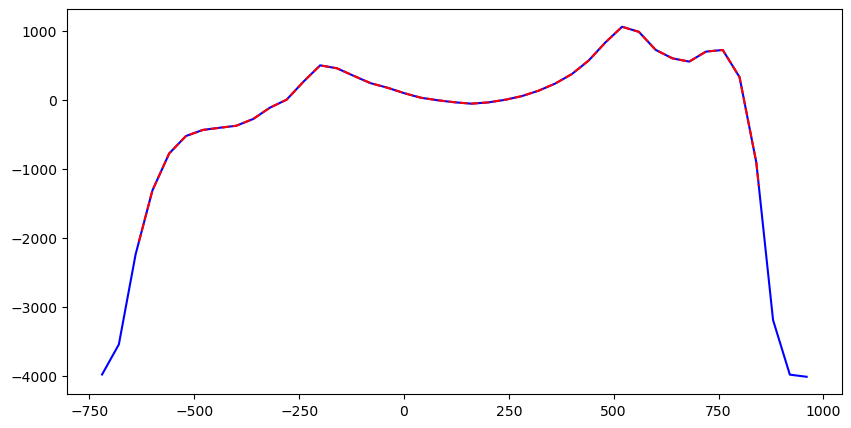

In [7]:
plt.rcParams["figure.figsize"] = (10,5)
plt.plot(x/1000.0, zb[x_parallel_transect_idx, :], color='blue', linestyle='-')
plt.plot(x_raw_data, zb_interpolated, color='red', linestyle='--')

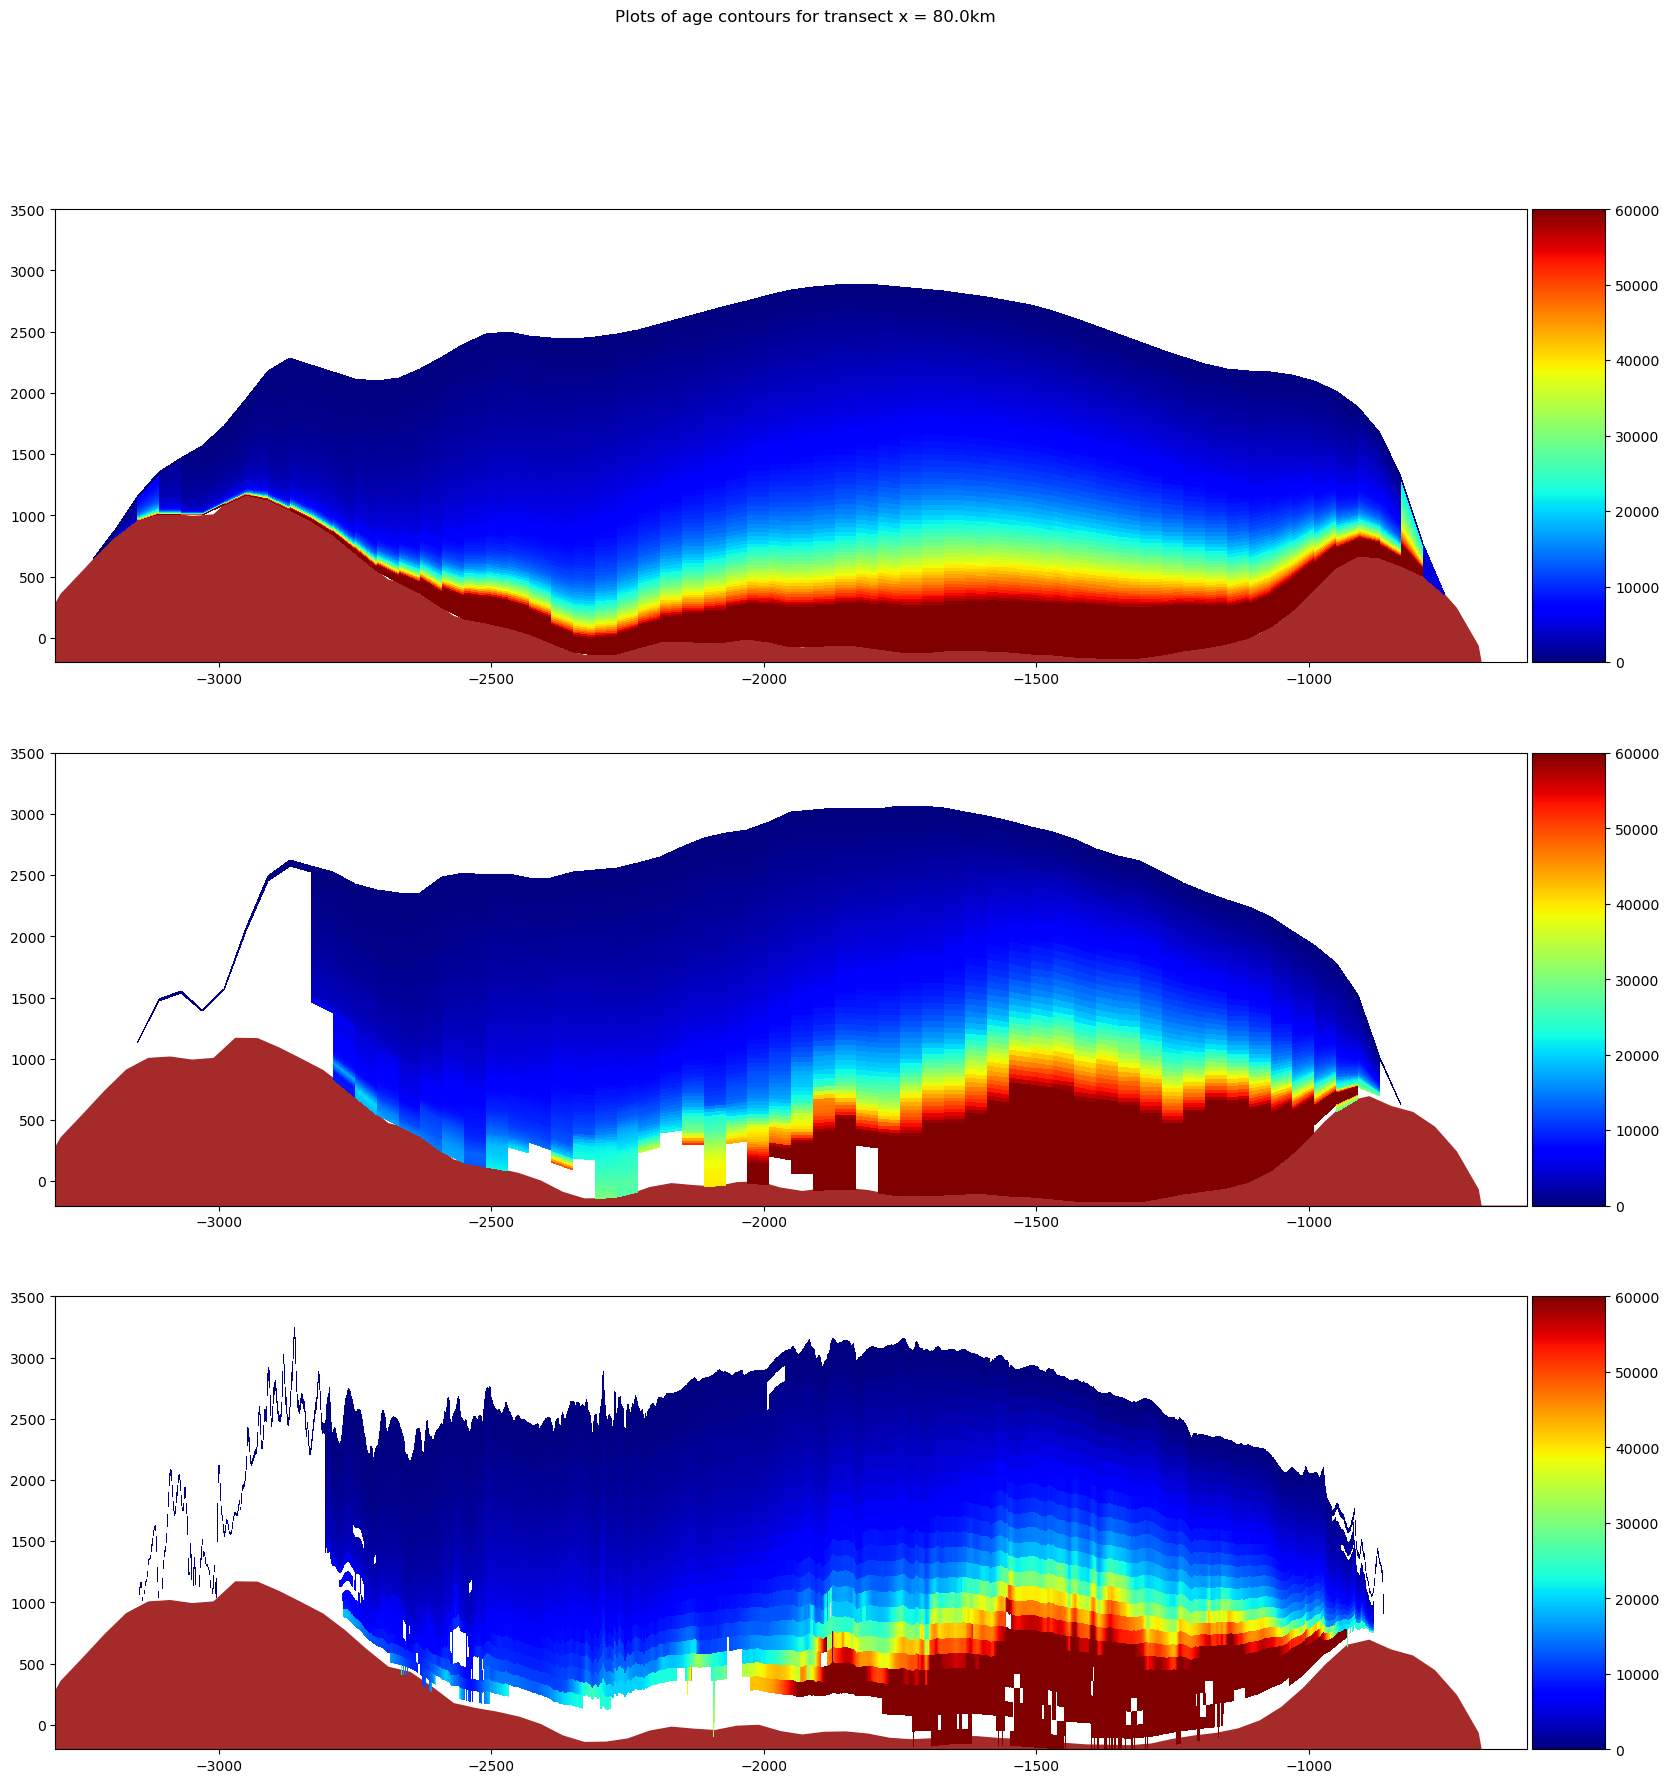

In [8]:
plt.rcParams["figure.figsize"] = (20, 20)
fig, ax = plt.subplots(3,1)

y_parallel_transect_idx = 20 # Corresponds to x = 80 km
y_parallel_transect_raw_data_idx = 712 # Corresponds to x = 80 km

fig.suptitle(f"Plots of age contours for transect x = {x_raw_data[y_parallel_transect_raw_data_idx]}km")

ax[0].fill_between(y/1000, zb[:, y_parallel_transect_idx], -200.0, color='brown', alpha=1.0)
z_coords = zb[:, y_parallel_transect_idx] + sigma_level_c[:, np.newaxis]*H[:, y_parallel_transect_idx]
# H_mask = H[:, y_parallel_transect_idx] >= 2000.0
im = ax[0].pcolormesh(yMesh/1000, z_coords, age_c[:, :, y_parallel_transect_idx], cmap = 'jet', vmin = 0, vmax = 60000)
ax[0].set_xlim(-3300, -600)
ax[0].set_ylim(-200, 3500)
divider = make_axes_locatable(ax[0])
cax = divider.append_axes('right', size='5%', pad=0.05)
colorbar = fig.colorbar(im, cax=cax)

ax[1].fill_between(y/1000, zb[:, y_parallel_transect_idx], -200.0, color='brown', alpha=1.0)
z_coords = zb[:, y_parallel_transect_idx] + sigma_level_c[:, np.newaxis]*H_data[:, y_parallel_transect_idx]
# H_data_mask = H_data[:, y_parallel_transect_idx] >= 2000.0
array = ds_age_40km['age_c'][:, :, y_parallel_transect_idx]
array = np.where(array == -999, np.nan, array)
im = ax[1].pcolormesh(yMesh/1000.0, z_coords, array, cmap = 'jet', vmin = 0, vmax = 60000)
ax[1].set_xlim(-3300, -600)
ax[1].set_ylim(-200, 3500)
divider = make_axes_locatable(ax[1])
cax = divider.append_axes('right', size='5%', pad=0.05)
colorbar = fig.colorbar(im, cax=cax)

interp_func = interp1d(y/1000.0, zb[:, y_parallel_transect_idx], kind='linear')
zb_interpolated = interp_func(y_raw_data)
z_coords = zb_interpolated + sigma_level_c_raw_data[:, np.newaxis]*H_raw_data[:, y_parallel_transect_raw_data_idx]
# H_raw_data_mask = H_raw_data[:, y_parallel_transect_raw_data_idx] >= 2000.0

ax[2].fill_between(y_raw_data, zb_interpolated, -200.0, color='brown', alpha=1.0)
im = ax[2].pcolormesh(yMesh_raw_data, z_coords, ds_age_correct['age_c'][:, :, y_parallel_transect_raw_data_idx], cmap = 'jet', vmin = 0, vmax = 60000)
ax[2].set_xlim(-3300, -600)
ax[2].set_ylim(-200, 3500)
divider = make_axes_locatable(ax[2])
cax = divider.append_axes('right', size='5%', pad=0.05)
colorbar = fig.colorbar(im, cax=cax)

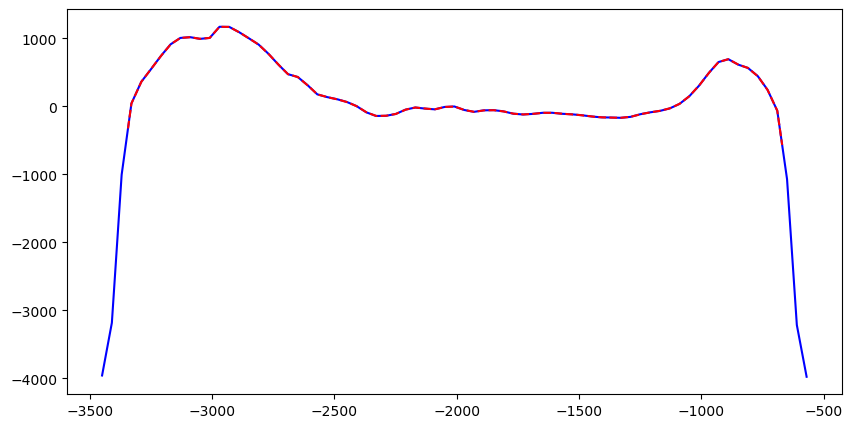

In [9]:
plt.rcParams["figure.figsize"] = (10,5)
plt.plot(y/1000.0, zb[:, y_parallel_transect_idx], color='blue', linestyle='-')
plt.plot(y_raw_data, zb_interpolated, color='red', linestyle='--')